In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
# TensorFlow: An open source library for deep learning
#cifar10: Sublibrary containing the CIFAR-10 dataset
# to_categorical: Used to convert class labels to one-hot encoding

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Sequential: Class used to create a sequential pattern
# Dense: Used for fully connected layers
# Conv2D: 2D convolution layer
# MaxPool2D: Maximum pooling layer
# Flatten: Flatten layer (flattens outputs)
# Dropout: Dropout layer used to prevent overlearning
# BatchNormalization: Layer used to normalize data
# EarlyStopping: Used to avoid oversleeping the model during training
# ImageDataGenerator: Used for data augmentation

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
# ConfusionMatrixDisplay: Used to visualize the confusion matrix
# classification_report: Shows the classification results as a detailed report
# confusion_matrix: Calculates the confusion matrix

In [7]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()  # Load CIFAR-10 dataset

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

170498071/170498071 [==============================] - 70s 0us/step
X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


C:\Users\AGSTAJER\AppData\Local\Temp\ipykernel_19396\1669870638.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(y_train[index])


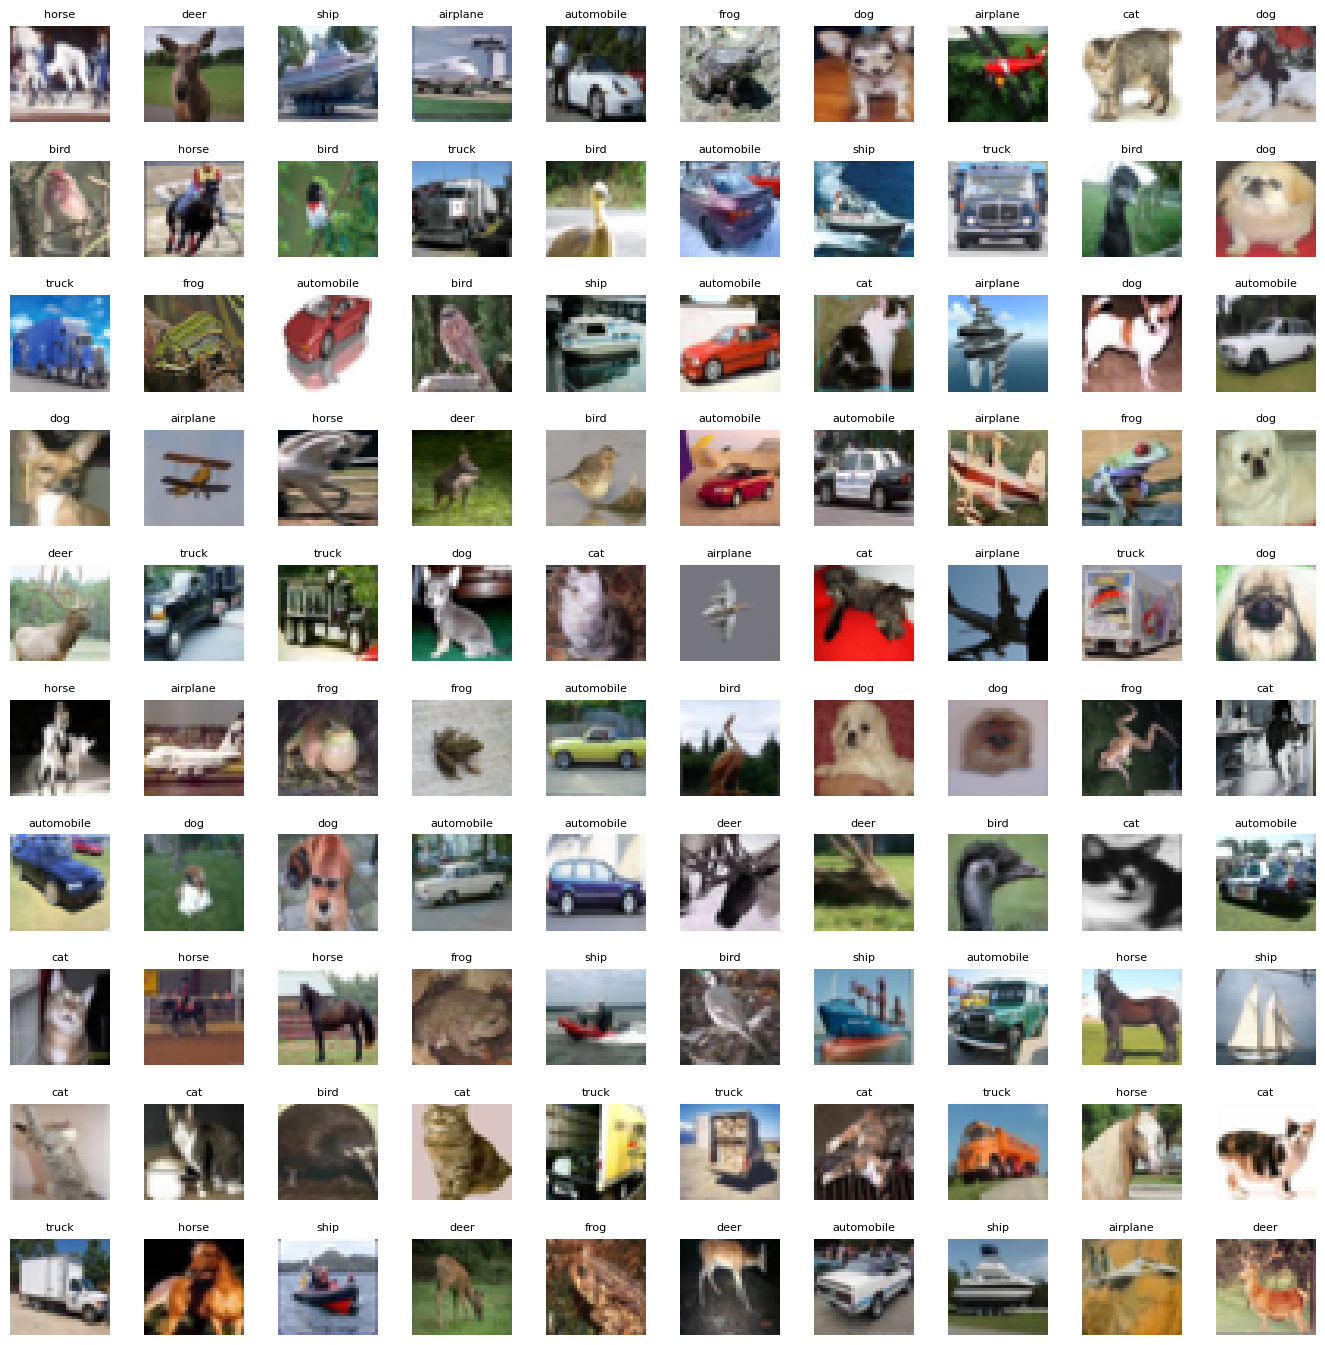

In [13]:
# Class labels of the CIFAR-10 dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Defining subchart layout dimensions
W_grid = 10
L_grid = 10
#subspecifies how many columns and how many rows there will be in the chart layout.
In #case, a 10x10 layout will be created, meaning there will be 100 subgraphs in total.

# Creating subplot objects
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # Get flattened subgraph objects
#The created subgraph objects are usually subjected to a flattening process.
#This changes the dimensions of the axes array and makes all subgraphs a one-dimensional array.

n_train = len(X_train) # get the length of the train dataset

# Placing random samples into a 10x10 subgraph layout
for i in np.arange(0, W_grid * L_grid): 
    index = np.random.randint(0, n_train)
    # Reading and displaying the image at the selected index
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Text(0.5, 1.0, 'Class distribution in training set')

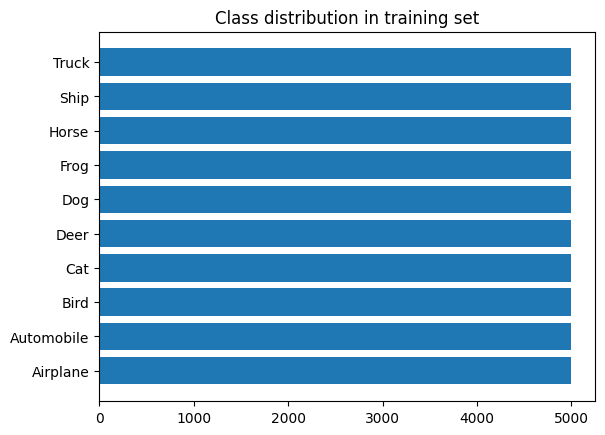

In [14]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_train, return_counts=True) # Obtain class labels and numbers

plt.barh(classes_name, counts)# Creating a horizontal bar chart

plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

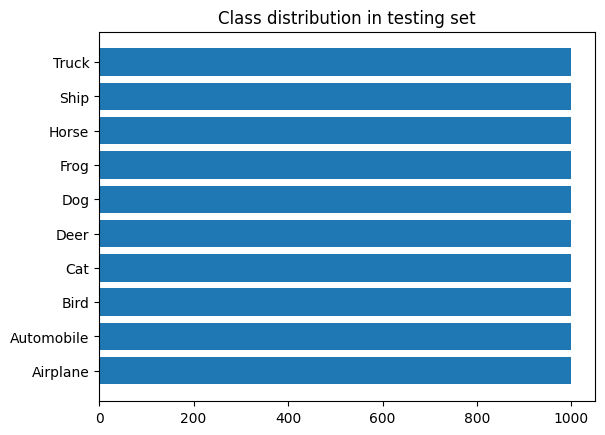

In [15]:
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in testing set')

In [16]:
X_train = X_train / 255.0
X_test = X_test / 255.0
#The images are divided by 255 to scale the data between 0 and 1.
#This is usually done in color images to move pixel values from the range [0, 255] to the range [0, 1].
#This can help deep learning models perform better.

y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)
The #to_categorical function is used to convert class labels into one-hot encoding format.
#y_train and y_test data are converted to one-hot encoding with the parameter num_classes=10 since it is a 10-class problem in this case.
# This allows representing each class with binary (0 and 1) vectors.

In [17]:
y_cat_train
# Each line represents one instance

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential() 
#Sequential() function creates a sequential neural network model. This model will be built by adding layers sequentially.

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
#First, a convolutional layer (Conv2D) is added. The parameters of this layer are:
#filters: The number of filters to use in the layer.
#kernel_size: Filter size.
#input_shape: The shape of the input data.
#activation: Activation function (ReLU used).
#padding: Padding type, 'same' used.
#Next, a normalization layer (BatchNormalization) is added.

# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))


model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))
#These steps are repeated several times, using different filter numbers and sizes to learn more complex features.

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))
#These steps are repeated several times, using different filter numbers and sizes to learn more complex features.

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
#Flatten layer converts the 3D output (usually an image) of convolutional layers into a flat vector.
#This flattens the feature map at the output of convolutional layers into fully connected layers.
Used to connect #(dense layers).

#Convolutional layers are designed to learn local features on images.
#However, these feature maps are 3D tensors and you cannot feed an output in this format directly into a fully connected neural network.
#So by flattening the output of convolutional layers, you are sorting each feature into a single vector.

#For example, the output of a convolutional layer might be: (32, 32, 64) This represents a feature map of size 32x32 pixels with 64 filters.
#Flatten layer converts this 3D output to a flat vector: (323264,) This vector can now be used as input to fully connected layers.

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
#accuracy accuracy metric is always used, the Precision and Recall metrics are also used to evaluate the classification performance of the model.
#Precision measures the rate at which samples classified as positive are actually positive, and Recall measures how many true positive samples are detected.

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)
#compile function prepares the model before training. Its parameters are as follows:

#loss='categorical_crossentropy': Multi-class crossentropy (categorical crossentropy) is used as the loss function.
# This is a commonly used loss function for multi-class classification problems.
#optimizer='adam': Adam optimization algorithm is used as the optimizer.
# Adam is a gradient descent type optimizing algorithm.
#metrics=METRICS: Specifies evaluation metrics.
# Metrics in the METRICS list defined above will be used.

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

Layer (type)     ---       Output Shape      ---         Param 


Then, the type, output shape, and number of parameters of each layer are shown in the table.

conv2d (Conv2D)             (None, 32, 32, 32)        896       
batch_normalization (Batch  (None, 32, 32, 32)        128       
conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
batch_normalization_1 (Bat  (None, 32, 32, 32)        128  

The first two lines represent the first convolutional layer. For each convolutional layer, there is a Conv2D layer and a BatchNormalization layer. The output type, (None, 32, 32, 32) and number of parameters of each layer are specified.

max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
dropout (Dropout)           (None, 16, 16, 32)        0     

Next, a MaxPooling2D layer and a Dropout layer are added.
These steps also apply to the second convolutional layer, which follows the same structure.

flatten (Flatten)           (None, 2048)              0         
dense (Dense)               (None, 128)               262272    
dropout_3 (Dropout)         (None, 128)               0         
dense_1 (Dense)             (None, 10)                1290      

Flatten layer flattens the output of convolutional layers. Next, two fully connected (dense) layers are added. The first fully connected layer has 128 neurons and the second layer has 10 neurons (for 10 classes).

Total params: 552362 (2.11 MB)

The total number of parameters of the model is 552,362. This represents the total number of weights and biases the model needs to learn.

Trainable params: 551466 (2.10 MB)

This is the number of trainable parameters of the model. The weights and bias values updated during training are included in this number.

Non-trainable params: 896 (3.50 KB)

This is the number of parameters of the model that were not updated during training. For example, there may be untrained parameters included in BatchNormalization layers, such as scaling and offset parameters.

In [20]:
# This line creates the EarlyStopping implementation to implement the early stopping strategy.
# EarlyStopping usually monitors the training process and returns a measurement (monitor) value (usually validation loss)
# stops training if it does not improve for a certain period of time (specified by the patience parameter).
# This can help prevent overlearning of the model and optimize training time.

early_stop = EarlyStopping(monitor='val_loss', patience=2)

# monitor='val_loss': The metric to monitor for early stopping. Here, validation loss (val_loss) will be monitored.
# It will stop training by observing the loss in the validation set of the model.

# patience=2: Parameter specifying how many epochs should be waited before recovery.
# If there is no improvement in the specified measurement during this time (epoch up to patience), an early stop will be triggered.

In [21]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# The batch_size variable determines the number of samples to be used in each training iteration.
# ImageDataGenerator is used to diversify training data using data augmentation techniques.
# In this example, horizontal panning, vertical panning and horizontal flipping operations are applied to the images.
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
# flow function creates a data generator that performs data augmentation operations.
# steps_per_epoch determines how many steps (batch) will be performed for each epoch.
# This ensures that the entire training data is passed over one epoch.

r = model.fit(train_generator, 
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test), 
# callbacks=[early_stop],
# batch_size=batch_size,
              )
#fit function performs the training of the model.
# Training is done using train_generator, which is a data generator.
#epochs parameter determines the total number of training epochs.
# Validation set is determined with the validation_data parameter.

Epoch 1/50


1562/1562 [==============================] - 281s 155ms/step - loss: 1.6179 - accuracy: 0.4124 - precision: 0.6223 - recall: 0.1998 - val_loss: 1.2964 - val_accuracy: 0.5312 - val_precision: 0.6879 - val_recall: 0.3883
Epoch 2/50
1562/1562 [==============================] - 228s 146ms/step - loss: 1.2191 - accuracy: 0.5683 - precision: 0.7334 - recall: 0.4033 - val_loss: 1.3663 - val_accuracy: 0.5300 - val_precision: 0.6618 - val_recall: 0.4248
Epoch 3/50
1562/1562 [==============================] - 220s 141ms/step - loss: 1.0466 - accuracy: 0.6360 - precision: 0.7705 - recall: 0.5027 - val_loss: 0.8874 - val_accuracy: 0.6983 - val_precision: 0.7979 - val_recall: 0.6051
Epoch 4/50
1562/1562 [==============================] - 216s 138ms/step - loss: 0.9381 - accuracy: 0.6787 - precision: 0.7954 - recall: 0.5658 - val_loss: 0.7916 - val_accuracy: 0.7268 - val_precision: 0.8145 - val_recall: 0.6420
Epoch 5/50
1562/1562 [==============================] - 222s 142ms/step - loss

Model Evaluation

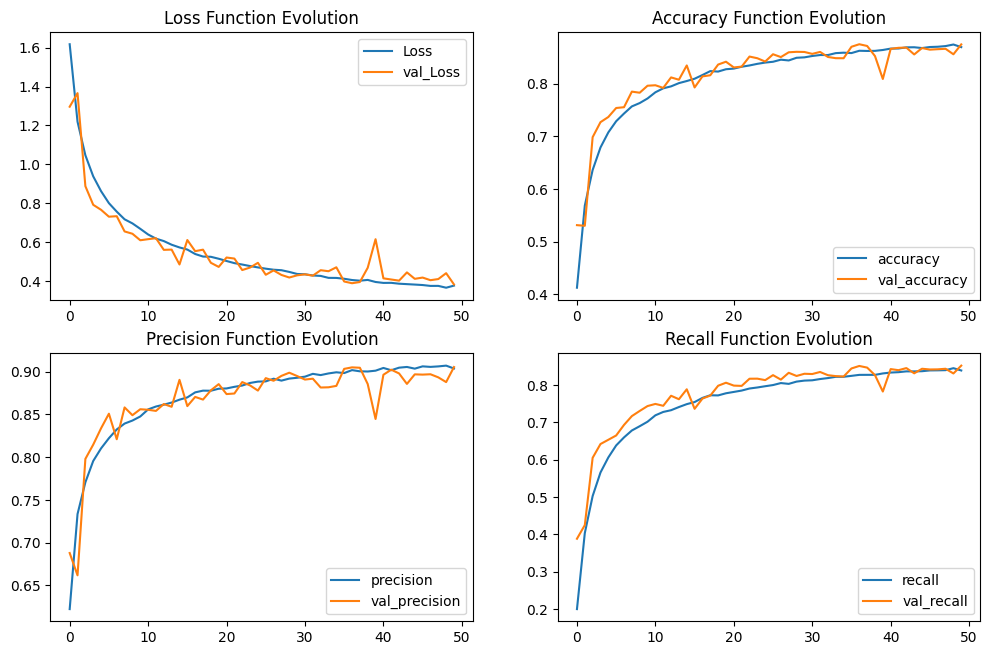

In [22]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()
#The first subplot shows the evolution of the training and validation loss function.

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()
#The second subgraph shows the evolution of the training and validation accuracy function.

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()
#The third subgraph shows the evolution of the training and validation precision function.

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()
#The fourth subplot shows the evolution of the training and validation sensitivity (recall) function.

313/313 [==============================] - 11s 35ms/step - loss: 0.3818 - accuracy: 0.8745 - precision: 0.9052 - recall: 0.8520
Test Accuracy : 87.45%
313/313 [==============================] - 25s 37ms/step


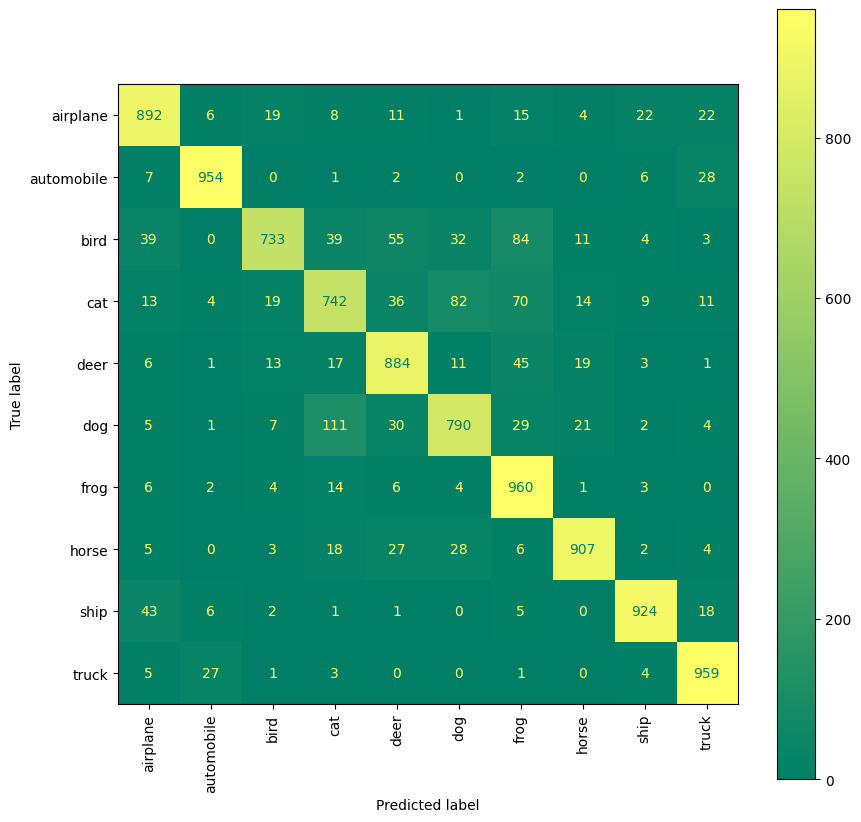

In [23]:
evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')
# The model is evaluated on the test dataset using the evaluate function.
# The test accuracy of the model is calculated and printed on the screen.

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred) #confusion_matrix function creates the confusion matrix between the actual labels and the labels predicted by the model.
# The model makes predictions on the test dataset and
# Class indexes with the highest probability are obtained by using the argmax function.

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')
# Finally, the confusion matrix is visualized using ConfusionMatrixDisplay.
# This shows how accurately the model predicted for each class and the distribution of incorrect predictions.
plt.show()

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1000
           1       0.95      0.95      0.95      1000
           2       0.92      0.73      0.81      1000
           3       0.78      0.74      0.76      1000
           4       0.84      0.88      0.86      1000
           5       0.83      0.79      0.81      1000
           6       0.79      0.96      0.87      1000
           7       0.93      0.91      0.92      1000
           8       0.94      0.92      0.93      1000
           9       0.91      0.96      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



Precision: Shows how many of a class's predictions are correct. Precision measures how many of the actually positive samples are predicted as true positives by the model.

Recall: Indicates how many of all samples that were actually positive were correctly detected by the model. Recall measures the proportion of true positives among all positive samples.

F1-Score: It is the harmonic mean of precision and recall. F1-score measures the accuracy of a class and indicates whether both precision and recall provide a balance.

Support: Shows how many instances there actually are for each class.

Total accuracy shows the rate of correct prediction of all classes. In this case, the correct classification rate of all samples in the test set is 87 percent.

Macro Avg (Macro Average): The macro average of precision, recall and f1-score values is taken for each class. Each class is assumed to have equal weight.

Weighted Avg: The weighted average of precision, recall and f1-score values is taken for each class. Each class is assumed to be weighted by the number of samples.

-----------------------------

Test on one image

 Image 100 is [4]
1/1 [==============================] - 0s 407ms/step
The model predict that image 100 is 4


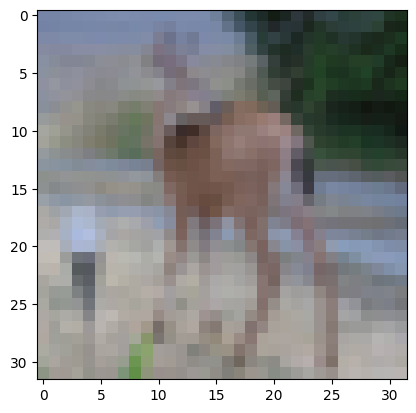

In [25]:
my_image = X_test[100]
plt.imshow(my_image)
# Selects an image (my_image) from the test dataset at a given index and visualizes this image.

print(f" Image 100 is {y_test[100]}")
# Prints the actual label (y_test[100]) at the selected index.

pred_100 = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image 100 is {pred_100}")
# Uses the predict function to make the model predict this example.
# Then it takes the class index with the highest probability with argmax.
# Prints the class predicted by the model to the screen.

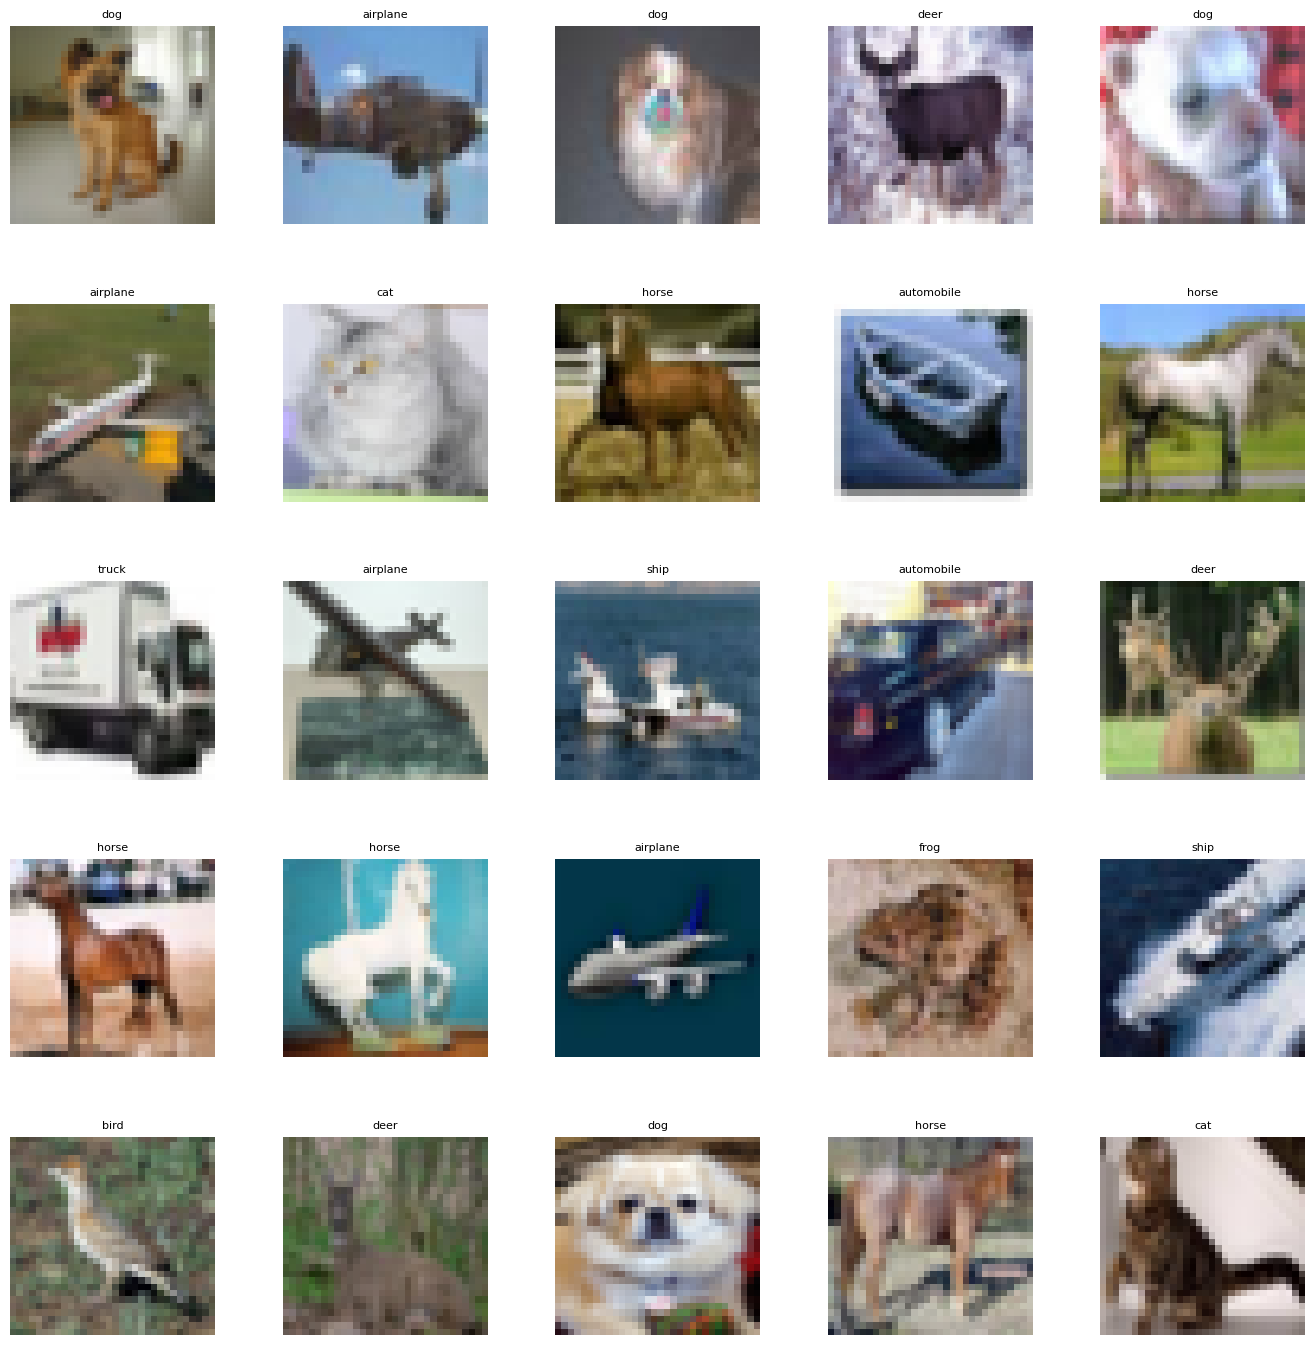

In [26]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

W_grid = 5
L_grid = 5

# The subplots function used with Matplotlib creates a subplot layout of the specified dimensions.
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel()  # Converts a 5x5 matrix into a flat 1D array

n_test = len(X_test) # Gets the length of the test dataset.

# A loop is created to traverse the subgraphs.
for i in np.arange(0, W_grid * L_grid):  

    # Select a random number
    index = np.random.randint(0, n_test)
    axes[i].imshow(X_test[index,1:]) 
    label_index = int(y_pred[index]) 
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off') 

plt.subplots_adjust(hspace=0.4)

In [27]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})", 
               color=color)
# Uses the imshow function to visually represent the image.
# Visually adds the predicted class and prediction confidence level.
# If the model's prediction is equal to the true class, it shows the text in blue; If not, it shows in red.
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
# Visually represents the model's prediction probabilities for each class using a bar chart.
# Highlights the bar of the predicted class in red.
# Highlights the bar of the actual class in blue.

313/313 [==============================] - 12s 38ms/step


C:\Users\AGSTAJER\AppData\Local\Temp\ipykernel_19396\3635252399.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})",
C:\Users\AGSTAJER\AppData\Local\Temp\ipykernel_19396\3635252399.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predictions_array, true_label = predictions_array, int(true_label[i])


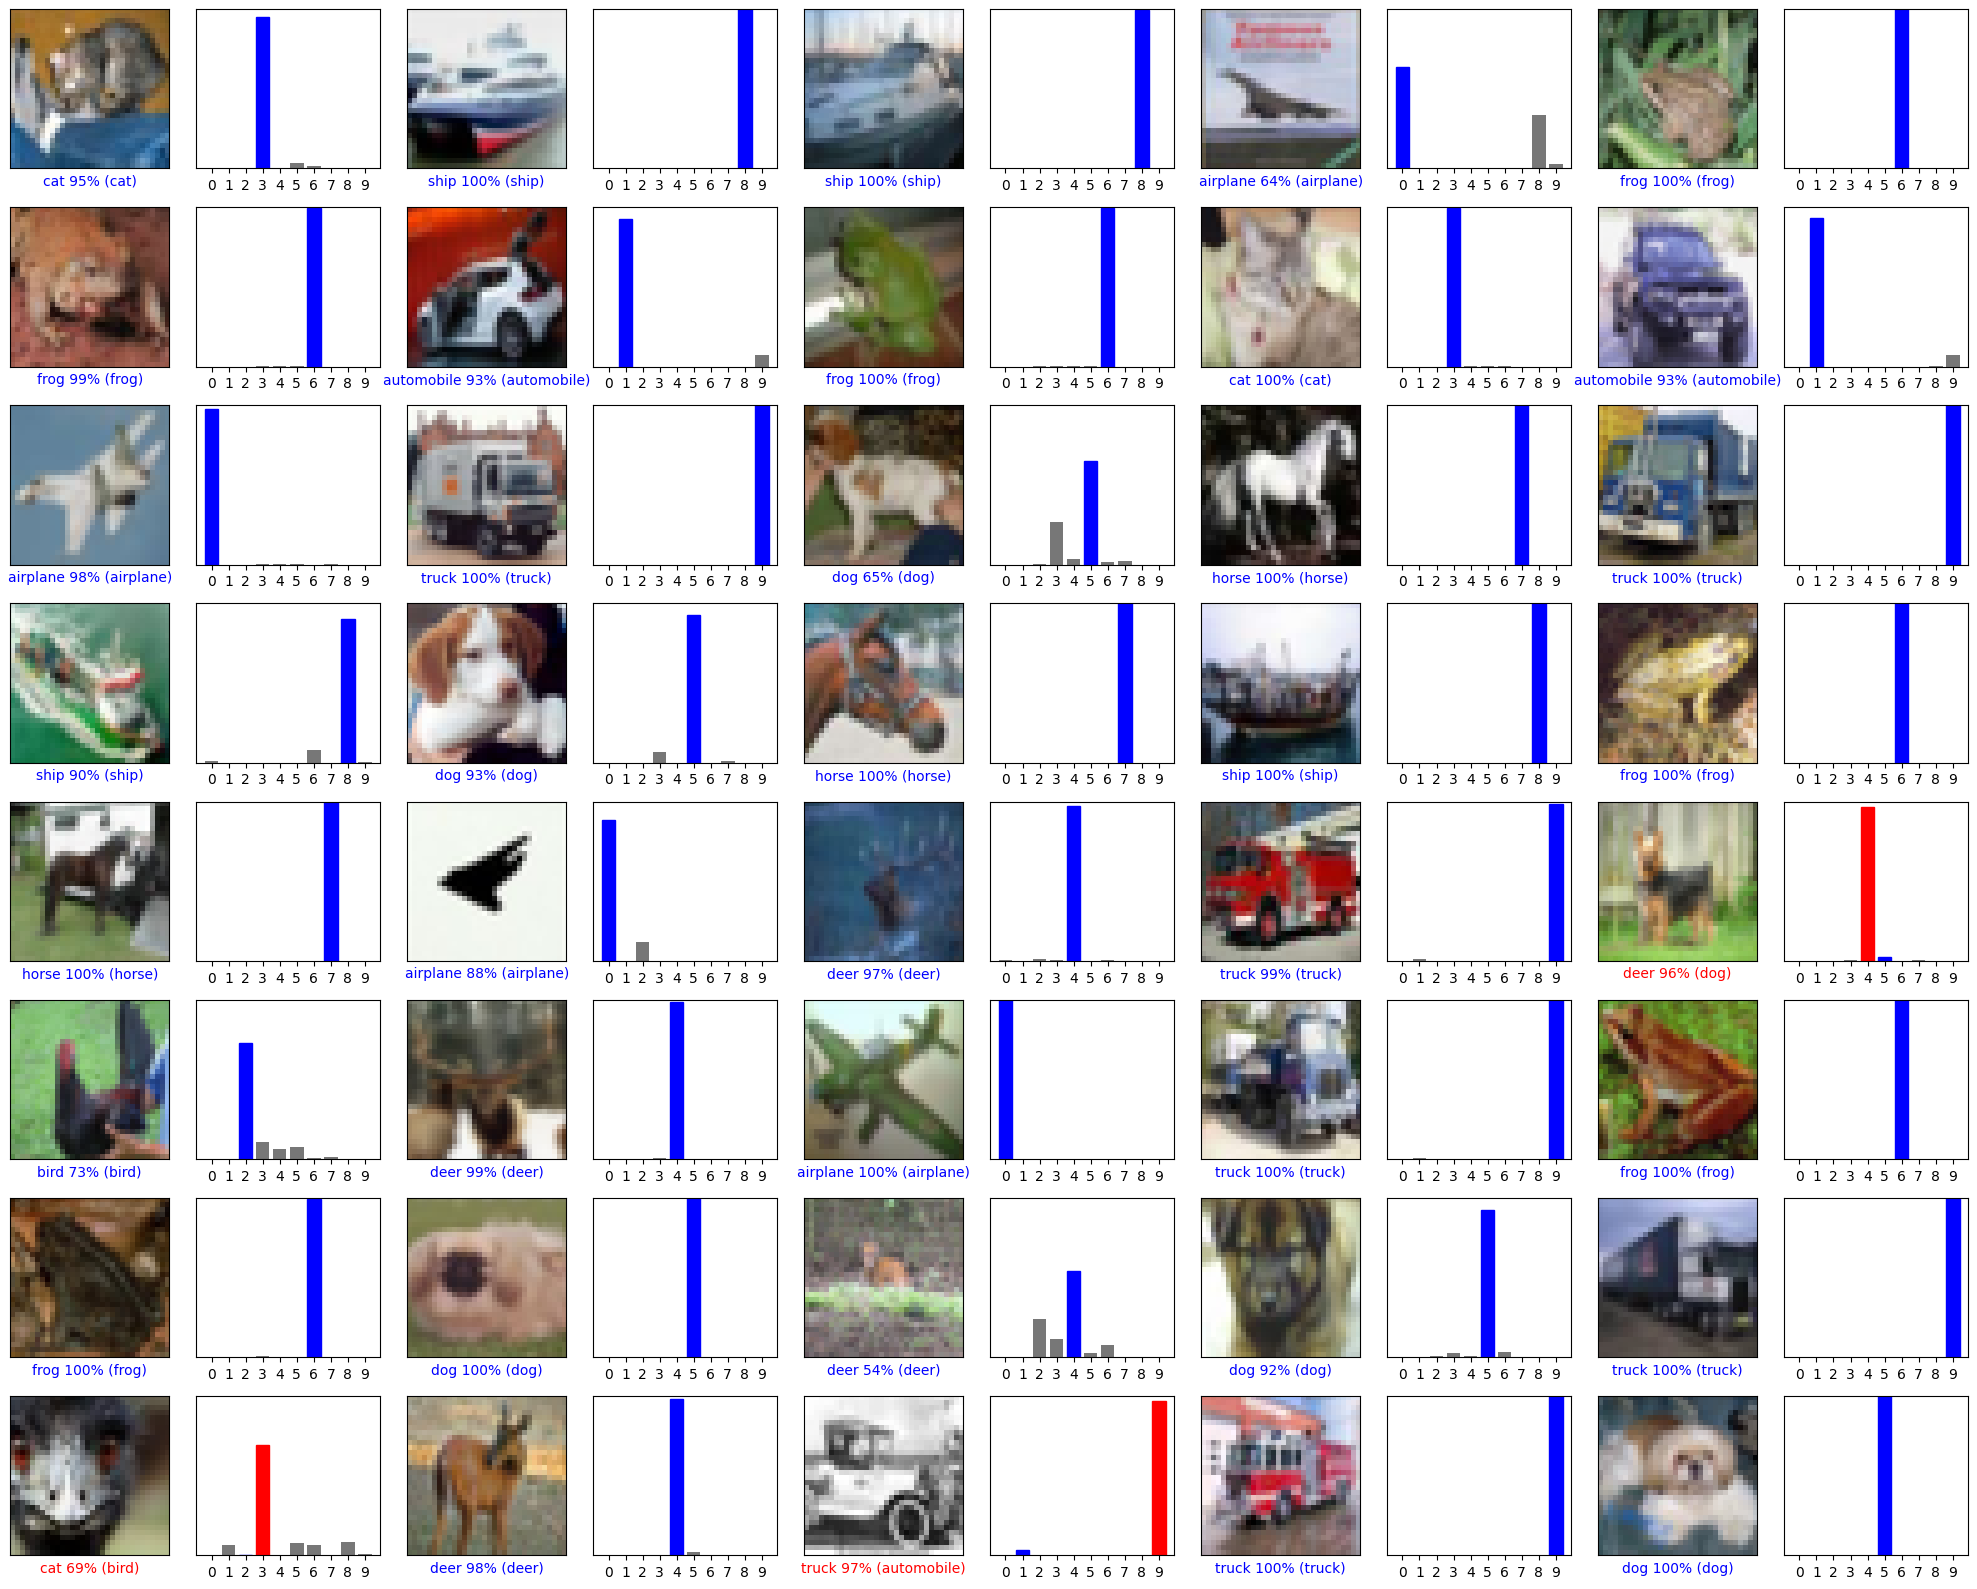

In [28]:
predictions = model.predict(X_test)

num_rows = 8
num_cols = 5

num_images = num_rows * num_cols 

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
# The figure function used with Matplotlib creates a visual figure and determines its size.

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1) # Determines the first subgraph layout for each image and
                                                    # calls the plot_image function to visualize the image and prediction results in this subplot.
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)       # Determines the second subgraph layout for each image and
                                                    # calls the plot_value_array function to visualize the prediction probabilities in this subplot.
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

# This code block calculates and evaluates the model's predictions on specific examples in the test dataset.
# used to visually examine prediction probabilities.
# Each subgraph represents an image and the model's prediction results.
# Whether the images are predicted correctly, probabilities of correct prediction and
# probability distributions of predicted classes can be evaluated with this visual.

------------------------------------
DenseNet model for image classification

In [ ]:
# an example to train the pre-trained DenseNet121 model on CIFAR-10 dataset using transfer learning
from keras.applications.densenet import DenseNet121
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
base_model = DenseNet121(input_shape=(32, 32, 3), include_top=False, weights='imagenet', pooling='avg') 
# input_shape - Specifies the size of the input dataset.
# include_top - Specifies not to include fully connected layers of DenseNet121 because these layers are unnecessary for the CIFAR-10 dataset.
# Creates the pre-trained DenseNet121 model.
# This model includes weights trained on the ImageNet dataset and performs feature extraction using Global Average Pooling (GAP).

model.add(base_model) # Adds the created DenseNet121 model to the newly created Sequential model.
model.add(Dense(10, activation='softmax'))#Adds the output layer for 10 classes.

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
# The loss function measures how far the model's predictions are from the actual labels.
# The optimizer determines the algorithm used to update the model's weights.
# Metrics are measurements used to evaluate the performance of the model.
# These parameters are the backpropagation and
# are important components that direct the weight update processes.

r = model.fit(train_generator, 
              epochs=100,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test), 
#               callbacks=[early_stop],
             )
# train_generator: Uses the training dataset as a augmented data generator.
# epochs=100: Performs training for 100 epochs.
# steps_per_epoch: Specifies how many steps to take in an epoch.
# validation_data=(X_test, y_cat_test): Used to evaluate the performance of the model on the validation set.

I didn't run the code because it needed to run for a very long time.

This code uses transfer learning principles to create a pre-trained model,
It is designed to adapt to distinguish classes in the CIFAR-10 dataset.

----------------------
Save the models

optional

In [30]:
from tensorflow.keras.models import load_model

model.save('cnn_20_epochs.h5')
# Saves the trained model in an HDF5 format named 'cnn_20_epochs.h5'. HDF5 (Hierarchical Data Format version 5),
# is a file format used to store large and complex data sets.
# This file contains the model's architecture, weights, and training state.

c:\Users\AGSTAJER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
